In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import torch
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path
import graphviz as gr

 No module named 'clip'


In [5]:
df, metadata_df = load_df()

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 178 result files to load.


Missing results for: init_rn50_d8192
Found missing supervised models for:


,pred,seed,arch
0,torch_linear_delta_hypopt,123,missing
1,torch_linear_delta_hypopt,123,missing
2,torch_linear_delta_hypopt,123,missing
3,torch_linear_delta_hypopt,123,missing
4,torch_linear_delta_hypopt,123,missing
5,torch_linear_delta_hypopt,123,missing
6,torch_linear_delta_hypopt,123,missing
7,torch_linear_delta_hypopt,123,missing
8,torch_linear_delta_hypopt,123,missing
9,torch_linear_delta_hypopt,123,missing


[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


,train-cmplmnt-ntest_train-sbst-ntest,train_train,train-cmplmnt-ntest_test,train_test,union_test,sup_train_train,sup_train_test,agg_risk,approx,usability,probe_gen,enc_gen
enc,,,,,,,,,,,,
dino_vitb16_extracts,19.042,0.811,23.680,23.572,NaN,1.548,16.046,23.572,1.548,-0.737,18.231,4.530
dissl_resnet50_d4096_e100_m2,32.994,0.491,32.988,32.846,NaN,0.845,24.244,32.846,0.845,-0.354,32.503,-0.148
dissl_resnet50_d8192_e100_m2,32.276,0.656,33.756,33.578,NaN,0.845,24.244,33.578,0.845,-0.189,31.620,1.302
dissl_resnet50_d8192_e400_m6,24.528,0.464,28.492,28.344,NaN,0.845,24.244,28.344,0.845,-0.381,24.064,3.816
dissl_resnet50_d8192_e800_m8,23.880,0.463,28.138,28.004,NaN,0.845,24.244,28.004,0.845,-0.382,23.417,4.124
init_vitb32,96.200,92.428,NaN,95.864,NaN,1.132,20.204,95.864,1.132,91.296,3.772,-0.336
init_vitl16,93.020,87.061,NaN,92.952,NaN,0.553,15.880,92.952,0.553,86.508,5.959,-0.068
pirl_rn50w2_headmlp,26.080,0.651,NaN,29.502,NaN,0.743,22.102,29.502,0.743,-0.091,25.429,3.422
simclr_resnet50_d8192_e100_m2,30.432,0.465,33.966,33.920,NaN,0.845,24.244,33.920,0.845,-0.381,29.967,3.488


The following results seem suspicously bad:


,agg_risk
enc,
beit_vitb16_pt22k,57.194


The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


,approx,usability,probe_gen,enc_gen
enc,,,,
dino_vits16_extractb,NaN,NaN,10.441,4.102
dino_vits16_last,NaN,NaN,4.293,3.812
dino_vits8_last,NaN,NaN,4.449,3.818
ibot_vits16,NaN,NaN,4.515,2.740
init_vits16,NaN,NaN,1.423,0.324
init_vits16_dino_extractb,NaN,NaN,3.921,0.050
mocov3_vits_ep300,NaN,NaN,5.416,3.850
msn_vits16_ep800,NaN,NaN,5.070,3.288
mugs_vits16_ep100,NaN,NaN,5.108,3.066


In [6]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [7]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1197 result files to load.


In [8]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test
enc,,,,,


In [9]:
df = pd.merge(left=df,right=std[CORE_METRICS[1:]],
              right_index=True,left_index=True)

# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

melted = melt(df)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-1%"])

In [10]:
#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']
df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)




CORE_STATISTICS = ['train_rank', "trainaug_vars","trainaug_nc1norm", 
                   'trainaug_alignment', "train_uniformity"]



melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

## Causal analysis

In the previous notebook we have tried to analyse the impact of various hyperparameters by considering runs where all other parameters were fixed. 
Although this is very good for causal implications, it only takes into account the few pretrained models that fix all but one parameters.
By taking advantage of our other data we could likely greatly improve statistical power of our results.

In this notebook we try taking advantage of all our data. To allow us to give a causal analysis we now have to be careful about potential confounders.
To do so we have to first take a step back and think about / make assumptions how the models we have access to were pretrained.
As a simplifying assumption we categorize each different hyperparameter into 3 categories depending on when researchers choose them.
1. At the highest level there is the initial choice of algorithm to evaluate and pretraining dataset. Those can typically affect each other.
2. Then comes "core" hyperparameters, which are ones that are well known to be crucial in self-supervised learning. Those are typically fixed very early on in a set of experiments or reported with different values to show their impact on the algorithm choice. We use the following core parameters: architecture, epochs, batch size and augmentations. We assume that those parameters do not directly impact each other as they are chosen early.
3. Finally, we have a wide range of "standard" hyperparameters (optimizers, schedulers, weight decay ...), which are typically tuned over for a fixed set of the previous hyperparameters. 

Hyperparameters in each of the aforementened groups do not affect hyperparameters in higher level. For analysing the causal impact of a certain variable we thus only need to condition on variables above.  

Problem: this would at least be somewhat true if hyperparameter tuning of the last layer was performed perfectly. In practice, however, this is not the case due to computational constraints. As a result the values of various hyperparameters has a confounder: who and when were experiments run (which in turn impact the questions of interest, access to compute, vested interested...). For example larger compute causes both different standard hyperaparameters (more tuning) and different "core" hyperparameters (eg architecture and epochs). To mitigate the issue we will try conditioning on those two confounders. 

Putting alltogether we have the following graphical causal model:

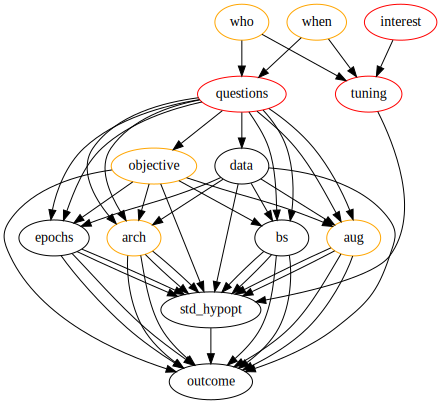

In [11]:
g = gr.Digraph()

top_hypopt_ideal = ["objective", "data"]
core_hypopt_ideal = ["arch", "epochs", "bs","aug"]
std_hypopt_ideal = ["patch_size",'z_layer', "optimizer", "learning_rate", "weight_decay", "scheduler","projection_arch","finetuning_data"]
     
for i in top_hypopt_ideal:
    g.edge("questions", i)
    g.edge(i,"std_hypopt")
    g.edge(i,"outcome")
    for j in core_hypopt_ideal:
        g.edge(i,j)
        g.edge(j,"std_hypopt")
        g.edge(j,"outcome")
        g.edge("questions", j)

g.edge("std_hypopt","outcome")
g.edge("tuning","std_hypopt")

for i in ["who","when"]:
    for j in ["tuning","questions"]:
        g.edge(i,j)
g.edge("interest","tuning")

# unobserved
for i in ["tuning","questions","interest"]:
    g.node(i, i, color="red")

# relatively high discrete cardinality
for i in ["objective","aug","arch","who","when"]:
    g.node(i, i, color="orange")

g

Red means that those are unobserved. For `questions` and `tuning` we will assume that most of the effect depends on `when` and `who` and `interst`. For `interest` we will replace it with `is_official`.


Orange means high cardinality. Whenever we condition on them as features / confounders instead of treatments we will thus replace them with the following variables:
- `obj` -> `ssl_mode`
- `aug` -> `[n_views,n_aug]`
- `arch` -> `[n_param,z_dim,patch_size,family]`
- `when` -> `year`
- `who` -> `is_industry`

Note: when analysing "core" hypermateres we do not need to condition on other core ones as they will typically be independent. We nevertheless condition on them to improve staistical power.


**Reminder Causality**:
- draw graphical model:
    - randomized trials removes all parent edges
- need:
    - condition on confounders (predict treatment and outcome)
    - don't condition on variables between path from cause to effect (selection bias)
    - don't condition on common effects (ie cause by both) of treatment and outcome (selection bias again)
- good:
    - condition on variables predicting outcome well (decreases variance)
    - not condition on variables predicting only treatment (decreases power)

To avoid huge cardinalities )when and who will essentially give singletons) we instead subdivide into coarse groups that can explain much of the confounding effect: publishing year (models comptue and folk knowledge), whether the model we have is the official one (models vested interest to have good results), and whether the pretrained model model was published from a big tech/company (models access to compute). In addition to being coarse confounders, they likely have a large impact on hyperparmeter tuning which in turn impacts performance => they will likely decrease the variance by much.



## Analysis

### Effect of epochs
Let's analyze the effect of epochs in controlled settings.

**Hypothesis** from the ISSL perspective we know that training for longer gets more optimal representations and thus this should help both the usability and probe gen. The encoder gen will likely increase as there is more overfitting

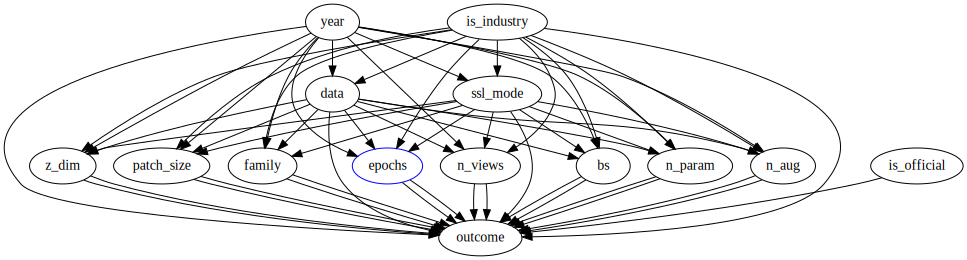

In [12]:
g,to_condition = causal_graph("epochs")
g

1. run xgboost using those parameter
2. run linear with good feature selection + tuning

note: only need to run a single model for each of the ones that you don't split

In [13]:
from causalml.inference.meta import *
from xgboost import XGBRegressor




In [20]:

onehot_features = ["family","is_official","pretraining_data","ssl_mode"]
features = ["nviews","batch_size","year","n_augmentations","z_dim","n_parameters","patch_size"]
objectives=["agg_risk"]
treatment = "epochs" 

# resnet can be seen as having of kernel_size
inp = melted.copy()
inp["patch_size"] = inp["patch_size"].fillna(7)
df["patch_size"] = df["patch_size"].fillna(7)
inp["finetuning_data"] = inp["finetuning_data"].fillna("Na")

In [21]:
g,to_condition = causal_graph(treatment)
log_condition = [f"np.log({c})" if c in TO_LOG else c for c in to_condition]
#log_condition = to_condition
ols_summary(inp, treatment, objectives=COMPONENTS, condition=log_condition+["{treatment}"], is_short=True, alpha=0.002)

probe_gen
rmse: 2.6032608003906383, delta: 0


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
epochs,-0.003017,0.000894,-3.375608,0.000984,-0.004786,-0.001248


In [22]:
df_pre = preprocess_features(df)
X,y=prepare_sklearn(df, target=objectives[0], features_to_keep=to_condition+[treatment], 
                    features_onehot="all")

In [23]:
lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X[[c for c in X.columns if c!=treatment]], X[treatment], y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))


AssertionError: Control group level 0 not found in treatment vector.

In [ ]:
xg = XGBTRegressor(random_state=42, verbosity=1, n_jobs=1)
te, lb, ub = xg.estimate_ate(X[["z_dim","epochs"]], X[treatment], y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))


In [ ]:
# this needs the propensity to be better than xgboost

xl = BaseXRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub = xl.estimate_ate(X[[c for c in X.columns if c!=treatment]], X[treatment], y)
print('Average Treatment Effect (BaseXRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

In [ ]:
# this needs the propensity to be better than xgboost

xr = BaseRRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub = xr.estimate_ate(X[[c for c in X.columns if c!=treatment]], X[treatment], y)
print('Average Treatment Effect (BaseXRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

In [19]:
X

,patch_size,n_parameters,z_dim,epochs,batch_size,year,is_official,is_industry,nviews,n_augmentations,ssl_mode_contrastive,ssl_mode_generative,ssl_mode_hierarchical,ssl_mode_siamese,ssl_mode_transform,family_resnet,family_vit,pretraining_data_CLIP,pretraining_data_ImageNet-22K,pretraining_data_other
enc,,,,,,,,,,,,,,,,,,,,
barlow_rn50,4,20000000.0,2048,1000.0,2048,2021,0,1,2,7,0,0,0,1,0,1,0,0,0,0
barlow_rn50_ep300,4,20000000.0,2048,400.0,2048,2021,0,1,2,7,0,0,0,1,0,1,0,0,0,0
beit_vitb16_pt22k,16,90000000.0,512,800.0,2048,2021,1,1,1,5,0,1,0,0,0,0,1,0,1,0
beit_vitl16_pt22k,16,300000000.0,1024,800.0,2048,2021,1,1,1,5,0,1,0,0,0,0,1,0,1,0
beitv2_vitb16_pt1k,16,90000000.0,512,1600.0,2048,2022,1,1,1,4,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vicregl_convnexts_alpha075,4,50000000.0,512,400.0,256,2022,1,1,8,7,0,0,0,1,0,0,0,0,0,0
vicregl_convnexts_alpha09,4,50000000.0,512,400.0,256,2022,1,1,8,7,0,0,0,1,0,0,0,0,0,0
vicregl_convnextxl_alpha075,4,350000000.0,2048,200.0,512,2022,1,1,8,7,0,0,0,1,0,0,0,0,1,0


In [21]:
df

,usability,enc_gen,probe_gen,approx,agg_risk,objective,ssl_mode,version,is_stopgrad,is_ema,...,pred_dim,projection_hid_width,projection_hid_depth,projection_arch,projection_nparameters,top1acc_in1k_official,n_negatives,finetuning_data,nviews,date_published
enc,,,,,,,,,,,,,,,,,,,,,
barlow_rn50,6.089213,3.382000,8.796193,10.506593,28.773999,barlow_twins,contrastive,1,False,False,...,8192,8192,2,mlp,151000000,71.80,4095,<NA>,2,2021-03-01
barlow_rn50_ep300,8.243343,3.367999,7.608064,10.506593,29.725999,barlow_twins,contrastive,1,False,False,...,8192,8192,2,mlp,151000000,70.75,4095,<NA>,2,2021-03-01
beit_vitb16_pt22k,37.681660,2.770001,7.026023,7.880315,55.357999,beit,generative,1,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,2021-06-01
beit_vitl16_pt22k,29.321549,2.891999,7.502827,5.639624,45.355999,beit,generative,1,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,2021-06-01
beitv2_vitb16_pt1k,4.181344,2.555999,8.548341,7.880315,23.165999,beit,generative,2,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,2022-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swav_rn50_ep400_2x224,8.274877,3.332001,8.662529,10.506593,30.776000,swav,clustering,1,True,False,...,128,2048,1,mlp,5000000,70.10,8192,<NA>,2,2020-02-01
swav_rn50_ep400_bs256,2.963470,3.120001,10.369937,10.506593,26.960000,swav,clustering,1,True,False,...,128,2048,1,mlp,5000000,74.30,4352,<NA>,8,2020-02-01
swav_rn50w2,4.321763,3.124000,13.119493,3.502744,24.067999,swav,clustering,1,True,False,...,128,8192,1,mlp,35000000,77.30,8192,<NA>,8,2020-02-01


In [20]:
to_condition

['pretraining_data',
 'ssl_mode',
 'epochs',
 'batch_size',
 'nviews',
 'n_aug',
 'n_parameters',
 'family',
 'z_dim',
 'patch_size',
 'year',
 'is_industry',
 'is_official']

In [ ]:
ols_summary(df_epochs, "epochs")

We see that training for one epoch improves usability by -0.0043 on average over controlled studies. 
Given that all other parameters are kept fixed and assuming that there are no confounders between who performed those experiments (and released models) and the treatment
effect, we can view this as a causal relation. For example increasing training by 400 epochs, would improve usability by an estimated $1.72 \pm 0.4$ points, and the overall performance
by $1.44 \pm 0.4$ points. Note that the p value is very small.

Another reason why this can be viewed causally is that most papers from groups with much compute provides models at different epochs regardless of the hyperparameters.

One natural question is whether the linear assumption holds. Why would increasing epochs modify the error in absolute terms rather than, say, relative terms (percentages). To test that let us regress the log outcome.

In [ ]:
ols_summary(df_epochs, "epochs", outcome="np.log(value)")

We see that such relation is still highly statistically significant. The issue is that for most models we only have 2 values and thus it is hard to know whether the dependence is relative or absolute.

### Effect of batch size
Let's analyze the effect of batch size in controlled settings

**Hypothesis** increasing the batch size should might have different impact on diffferent types of ssl models. For contrastive and clustering it will generally improve the estimation of the objective which should improve usability and probe gen. But increasing batch size also decreases the number of steps which will decrease the previous two. So it will likely have better effect for longer epochs but unclear effects when small epochs. I.e. need to controll for epochs and ssl_mode. Finally, increasing batch size might help overfitting => decrease encoder generalization.

In [ ]:
df_bs = melt(get_only_vary(df, ["batch_size"], core_params))

with plot_config():
    g = sns.relplot(data=df_bs, x="batch_size", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    

Although we don't have many data points, it seems that probing generalization worsens while usability improves. 

In [ ]:
ols_summary(df_bs, "batch_size")

### Effect of multicrops

Let's analyze the effect of batch size in controlled settings

**Hypothesis** More multicrops increases the invaraince => bettter generalization of the predictor and better usability (fewer equivalence classes). Generalization of the encoder is not clear: it might have more overfitting on that data.

In [ ]:
df_nviews = melt(get_only_vary(df, ["nviews"], core_params))

with plot_config():
    g = sns.relplot(data=df_nviews, x="nviews", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    #g.set(xscale="log")
    


In [ ]:
ols_summary(df_nviews, "nviews")

### Effect of dimensionality

Let's analyze the effect of dimensionality in controlled settings

**Hypothesis** Higher dimensionality should increase usability but decrease generalization of the probe. Encoder generalization is not very clear.

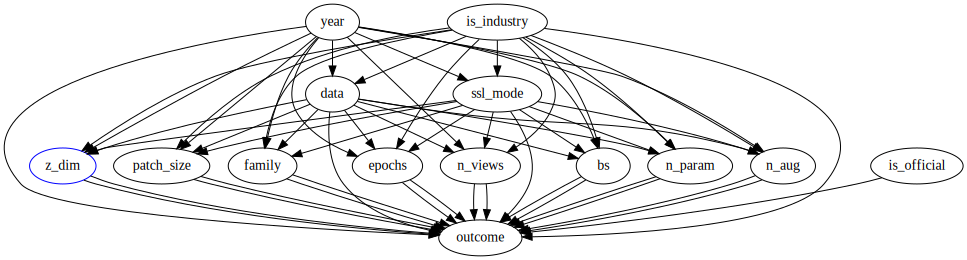

In [22]:
g,to_condition = causal_graph("z_dim")
g

In [23]:
to_condition

['pretraining_data',
 'ssl_mode',
 'np.log(epochs)',
 'np.log(batch_size)',
 'np.log(nviews)',
 'n_augmentations',
 'n_parameters',
 'family',
 'np.log(z_dim)',
 'patch_size',
 'year',
 'is_industry',
 'is_official']

In [ ]:
df_zdim = melt(get_only_vary(df, ["z_dim"], core_params))

with plot_config():
    g = sns.relplot(data=df_zdim, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [ ]:
ols_summary(df_zdim, "z_dim")

Just as hypothesized, the effect of probe generalization and suability are (the only) significant. For example we see that increasing representation dimensionality from 2000 to 8000 is predicted to improve usability by a huge $5.4$ points but decrease generalization by $3.6$ with a total gain of $1.8$.

Note that directly modifying the diemsnionality was not common under ISSL, but there are two other ways that researchers have indirectly been modifying the representation dimensionality. 

The first one is mostly done in ViT and consists of concatenating representations from different layers of a model. Let us analyse the effect of such dimensionality modification under the assumption that concatenating only impacts dimensionality.

In [ ]:
df_zlayer = melt(get_only_vary(df, ["z_dim","z_layer"], core_params, drop_cols=["pretraining_data"]))
#df_zlayer = df_zlayer[df_zlayer.family == "vit"]

with plot_config():
    g = sns.relplot(data=df_zlayer, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [ ]:
ols_summary(df_zlayer, "z_dim")

We see that the the effect of changing the dimensionality due to concatenation has the same effect as changing directly the dimensionality but stronger, which suggests that concatenating is just a cheap way of increasing dimensionality.

Another indirect way researchers increase dimensionality is by using resnets of different widths, this is tyipically motivated by increasing the number of parameters of a model but also has an effect on the dimensionality of the representations.


In [ ]:
df_zdimarch = melt(get_only_vary(df, ["z_dim","architecture"], core_params, drop_cols=["pretraining_data"]))

with plot_config():
    g = sns.relplot(data=df_zdimarch, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [ ]:
ols_summary(df_zdimarch, "z_dim")

### Effect of architecture

Now let us look more specifically at the general effect of the architecture.

#### Size
First let us consider the effect of the size of the architecture

**Hypothesis** Larger architectures should first and foremost decrease the approximation gap. Furthermore larger models typically have larger diemnsionality and thus from the previous paragraph we hypothesize that the probing generalization should worsen and the usability should improve.

In [ ]:
disregard = ["img_size","z_layer","patch_size","z_dim"]
df_arch = melt(get_only_vary(df.drop(columns=disregard), 
                             ["architecture"], 
                             [c for c in core_params if c not in disregard],
                              drop_cols=["pretraining_data"]))
#df_arch.n_parameters = df_arch.n_parameters // int(5e6) * int(5e6)

with plot_config():
    g = sns.relplot(data=df_arch, x="n_parameters", y="value", hue="non_vary", col="component", row="family", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

We see that the clearest effect is for the approximation gap which decreases drastically for larger models. Note that it is not clear whether the effect of number of parameters is linear and so the following analysis is not great.

In [ ]:
ols_summary(df_arch, "n_parameters")

We see that that when using a linear relationship approximation does not seem meaningfull, lewt us instead use log number of parameters as in the above plots. 

In [ ]:
ols_summary(df_arch, "n_parameters", condition="np.log10({treatment})")

We now have that the number of parameters has a high impact on the approximation gap, as expected. In particular we have that increasing the log10 parameters by one, i.e., multiplying the number parameters by 10 will improve approximation by $\approx-6$. 

#### ViT vs ResNet
Now that we have considered the effect of number of parameters, let us consider the effect of using ViT vs ResNet

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

In [ ]:
curr_df = df.copy()
curr_df.n_parameters = curr_df.n_parameters // int(30e6) * int(30e6) # coarse grains

df_family = melt(get_only_vary(curr_df, ["family"],  ["family","objective","n_parameters","version","epochs"]))


with plot_config():
    g = sns.catplot(data=df_family, x="family", y="value", hue="non_vary", col="component", kind="bar",
                    facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)

In [ ]:
ols_summary(df_family, "family")

We see that there seems to be nothing significative, most likely because we only have 2 models that are trained on RN and ViT. This will likely be more conclusive when performing causal analysis. Note furethermore that there are other parameters (training hyperparameters) that we did not control.

#### Effect of patch size

Another important component of architecture that is not taken into account by number ofa parameters and family, is the patch size of ViT. 

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

In [ ]:
df_patch = melt(get_only_vary(df, ["patch_size"],  core_params+["patch_size"], drop_cols=["data"]))#,

with plot_config():
    g = sns.relplot(data=df_patch, x="patch_size", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)

In [ ]:
df_patch.patch_size = df_patch.patch_size.astype("int")
ols_summary(df_patch, "patch_size")

We see that the aggregated performance significantly improves with smaller patch_size on all components! 

### Effect of projection 

Another hyperparameter that people have found to be very important is the architecture of the projection head.

**Hypothesis**: from ISSL we know that non linear projection heads on only branch can help optimization of the representations (usability and probing generalization), but on both sides they do not ensure linear predictability anymore (drop on usability). 

#### Architecture

In [ ]:
df_proj = melt(get_only_vary(df, ["projection_arch"], core_params, 
                            drop_cols=["year","optimizer","learning_rate", 'weight_decay']))

with plot_config():
    g=sns.relplot(data=df_proj.sort_values("projection_arch"), x="projection_arch", y="value", hue="non_vary", 
                  kind="line", col="component", facet_kws={'sharey': False}, err_style="bars")
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [ ]:
ols_summary(df_proj, "projection_arch")

We see that usability improves while probe gen worsen's.
One issues is that with simclr and dissl we don't actually differentiate between proj of the teacher or student.
Let's consider the more fine grained now.

In [ ]:
dissl_proj = ["dissl_resnet50_dNone_e100_m2_headTMlpSMlp","dissl_resnet50_dNone_e100_m2_headTLinSLin","dissl_resnet50_dNone_e100_m2"]
dissl_proj = [d.lower() for d in dissl_proj ]
df_dissl_proj = df.loc[df.index.isin(dissl_proj)]
df_dissl_proj[components]

We see that for dissl it has little effect, with the best being the asummentric proposed in ISSL.

In [ ]:
simclr_proj=df.query("`objective` == 'simclr' and `nviews` == 2 and `epochs`==100 and `z_dim` == 2048 and `architecture`=='resnet50'")
simclr_proj[components]

We see that for simclr it has a large effect, with the best being by far MLP / MLP, and MLP/LIN giving little gains compared to LIN/LIN.

### Effect of data

Until now we have not talked about an important part of the SSL pipeline: the pretraining data. We investigate that now.

#### Effect of data percentage

First let us consider the effect of training on more data from the same distribution.

**Hypothesis** Training on more in distribution data should improve mostly encoder generalization. 

Unfortunately there will also be a mistake on how we evaluate because models that were trained on a subset of imagenet will actually have a encoder generalization component in the usability (because the training set of imagenet will now not have been seen). As a result we will actually likely see an improvement on usability and a **decrease** in encoder generalization when increasing the pretraining data (because usability now takes into account encoder generalization and so the delta will be smaller when compariong to pure encoder generalization). This is a very unfortunate problement which doesn't seem to have a simple solution, I think I will thus drop those risk decomposition results.

In [ ]:
df_dataperc = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if taking percentages
df_dataperc = df_dataperc.loc[["%" in d for d in df_dataperc.pretraining_data],:]

if len(df_dataperc) > 0:
    with plot_config():
        g=sns.catplot(data=df_dataperc, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

#### Effect of IN20k

Prewviously we saw the effect of the training size (percentage) now let us consider different datasets.

**hypothesis** if the distribution of the training set there will be some shift which will likely worst then encoder generalization. But at the same time if the data increases we will likely see better usability and probing generalization.

In [ ]:
df_data = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if not taking percentages
df_dataperc = df_dataperc.loc[["%" not in d for d in df_dataperc.pretraining_data ],:]

if len(df_dataperc) > 0:
    with plot_config():
        g=sns.catplot(data=df_data, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [ ]:
ols_summary(df_data, "pretraining_data")

Although the trend are as predicted, we see that the results are not statistically significant, likely because we only have 2 models. THis will probably be solved once we do a general caussal discovery.

#### Effect of finetuning

In [ ]:
curr_df = df.copy()
curr_df["is_finetuned"] = curr_df.finetuning_data.isna()
df_ft = melt(get_only_vary(curr_df, ["is_finetuned"], core_params+["is_finetuned"], 
                            drop_cols=[]))

if len(df_ft) > 0:
    with plot_config():
        g=sns.catplot(data=df_ft, x="is_fintetuned", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))